# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [21]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [30]:
adultDataSet_filename=os.path.join(os.getcwd(),"data","adultData.csv")

df=pd.read_csv(adultDataSet_filename)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [31]:
#Replacing missing values with mean
df.fillna(df.mean(),inplace=True)
df.replace([np.inf,-np.inf],np.finfo(np.float32).max,inplace=True)
X=df.drop('income_binary',axis=1)
y=df['income_binary']

#Fixing Feature names
new_column_names={
    'age':'Age',
    'workclass':'Work Class',
    'fnlwgt':'Final Weight',
    'education':'Education',
    'education-num':'Education Num',
    'marital-status':'Marital Status',
    'occupation':'Occupation',
    'relationship':'Relationship',
    'race':'Race',
    'sex_selfID':'Sex',
    'capital-gain':'Capital Gain',
    'capital-loss':'Capital Loss',
    'hours-per-week':'Hours per Week',
    'native-country':'Native Country',
    'income_binary':'Income Binary',
    'Work Class_Self-emp-not-inc':'Work Class; Self-Employed (Not Inc.)',
    'Occupation_Prof-specialty':'Occupation: Professional/Specialty',
    'Occupation_Exec-managerial':'Occupation: Executive/Managerial',
    'Marital Status_Married-civ-spouse':'Marital Status: Spouse'

}

X.rename(columns=new_column_names,inplace=True)

In [32]:
X_encoded=pd.get_dummies(X)
#Splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X_encoded, y,test_size=0.2,random_state=42)

# Separate majority and minority classes
majority_class=X_train[y_train =='<=50K']
minority_class=X_train[y_train=='>50K']

# Making sure there are enough datapoints to undersample
if len(minority_class)>len(majority_class):
    raise ValueError("Not enough samples in the minority class for undersampling.")

#Undersampling
num_samples_to_remove=len(majority_class)-len(minority_class)

undersampled_majority_indices=np.random.choice(majority_class.index,size=num_samples_to_remove,replace=False)
undersampled_majority=majority_class.loc[undersampled_majority_indices]
undersampled_train_data=pd.concat([undersampled_majority, minority_class])
undersampled_train_data=undersampled_train_data.sample(frac=1,random_state=42)

#Split the undersampled data back into X_train and y_train
X_train_undersampled=undersampled_train_data
y_train_undersampled=y_train[X_train_undersampled.index]

#Implementing GradientBoostingClassifier 
gb_classifier=GradientBoostingClassifier()
gb_classifier.fit(X_train_undersampled,y_train_undersampled)

#Predicting
y_pred=gb_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.92      0.92      4942
        >50K       0.74      0.71      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513



In [33]:
#Checking for outliers
data={
    'feature1':[10,20,30,40,50,200],
    'feature2':[5,10,15,20,25,100]
}
df=pd.DataFrame(data)

z_threshold=3
z_scores=np.abs((df-df.mean())/df.std())

outliers=(z_scores>z_threshold).any(axis=1)

print(df[outliers])

Empty DataFrame
Columns: [feature1, feature2]
Index: []


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [34]:
#Hyperparamenter tuning to increase performance
param_grid={
    'n_estimators':[50,100,150],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5]
}
#Fitting the model on the undersampled training data
gb_classifier.fit(X_train_undersampled,y_train_undersampled)

#Making predictions
y_pred=gb_classifier.predict(X_test)

#Evaluating the model's performance
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))


              precision    recall  f1-score   support

       <=50K       0.91      0.92      0.92      4942
        >50K       0.74      0.71      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.83      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513



In [35]:
#Creating a GridSearchCV instance
grid_search=GridSearchCV(estimator=gb_classifier,param_grid=param_grid,cv=3)

#Fitting the grid search on the training data
grid_search.fit(X_train,y_train)

#Finding the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:",best_params)

#Repeating earlier process with the best hyperparameters
best_gb_classifier=GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train,y_train)

y_pred_best=best_gb_classifier.predict(X_test)

print("Best Model Performance:")
print(classification_report(y_test,y_pred_best))


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best Model Performance:
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4942
        >50K       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513



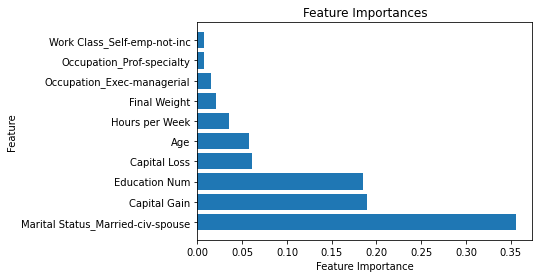

In [36]:
#Feature selection
feature_importances=best_gb_classifier.feature_importances_

feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances})

feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

#Plot
top_ten_features=feature_importance_df.head(10)
plt.figure
plt.barh(top_ten_features['Feature'],top_ten_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
#This graph shows that the most important features for figuring out whether soemone is making above the limit of $50,000 is whether or not they are married. There is a large gap between this featere and the next two, which are how much education they got and capital gain. This is interesting because literally speaking an increase in capitol gain is an increase in assets, however, capital loss (its counterpart) is also on this list. I believe this to be because many people who are well off use passive income. Many invest in and purchase stocks, which allows for both capital gain and loss.